In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

%pylab inline
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.metrics import confusion_matrix

def save_value(x,y):
    if y == 0:
        return 0
    return x / y

def ConfusionMatrix(y_true,y_predict):
    CM=confusion_matrix(y_true, y_pred)
    return CM

# Multiclass Confusion Matrix
# Entries:
# y_true: true values of the classification
# y_predict: predict values of the classification
# C: quantity of classes 

# Haciendo la matriz de confusion binaria para la clase i
from sklearn.metrics import confusion_matrix
def MultiClassConfusionMatrix(y_true,y_pred):
    
    C= np.unique(y_true)
    D=len(C)
    
    # Matriz de confusion general 
    CM=confusion_matrix(y_true, y_pred)
    #print('###### General Confusion Matrix #####')
    #print(CM)
        
    accuracy=np.zeros(D)
    precision=np.zeros(D)
    recall=np.zeros(D)
    specificity=np.zeros(D)
    
    
    for i in range(D):
        #atrib=np.array(C)
        #print('aquiii')
        #print(C)
        atributo=C[i]
        row_i=CM[i,:]
        col_i=CM[:,i]
        
        row_i_without_i=np.delete(row_i,i,0)
        #print(row_i_without_i)
        col_i_without_i=np.delete(col_i,i,0)
        del_row_i=np.delete(CM,i,0)
        del_col_i=np.delete(del_row_i,i,1)
        
        VP=CM[i,i]
        #print(VP)
        FN=np.sum(row_i_without_i)
        #print(VN)
        FP=np.sum(col_i_without_i)
        VN=np.sum(del_col_i)
#         print('VP VN FP FN', VP, VN,FP,FN )
        
        CM_new=[[VP,FN],[FP,VN]]
        #print(CM_new)
        CM_new=np.array(CM_new) # casting

        # calculando las medidas de desempenho
        div1=VP+VN+FP+FN
        #print(div1)
        div2=VP+FP
        div3=VP+FN
        div4=VN+FP
        
        accuracy[i]=save_value((VP+VN),div1)
        precision[i]=save_value(VP,div2)
        recall[i]=save_value(VP,div3)
        specificity[i]=save_value(VN,div4)
        
        #print('###### Confusion Matrix para clase ',atributo, ' #####')
        #print(CM_new)    
        
    Table = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'specificity': specificity}
    df = pd.DataFrame(data=Table)
    print(df)
    #print(accuracy.shape)
#     return accuracy
    #print(df)

In [3]:
train = pd.read_csv('porto-seguro-safe-driver-prediction/train.csv')

In [4]:
target = train['target']
print(type(target))

<class 'pandas.core.series.Series'>


In [5]:
train=train.drop(['target', 'id'], axis = 1)

In [6]:
train.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train = train.replace(-1, np.NaN)

In [8]:
train = train.drop(['ps_reg_03','ps_car_03_cat','ps_car_05_cat'], axis = 1)

In [9]:
train = train.replace(np.NaN, -1)

In [10]:
#Select features according to the k highest scores
#Using f_regression that is an univariate linear regression tests, 
#The correlation between each regressor and the target is computed 
#It is converted to an F score then to a p-value
from sklearn.feature_selection import SelectKBest, f_regression
X_best=SelectKBest(f_regression, k=10)
X_new=X_best.fit_transform(train,target)

mask = X_best.get_support()
new_features = train.columns[mask]
print(new_features)

Index(['ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_17_bin',
       'ps_reg_02', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_07_cat',
       'ps_car_12', 'ps_car_13'],
      dtype='object')


In [11]:
train1=train[['ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_17_bin',
       'ps_reg_02', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_07_cat',
       'ps_car_12', 'ps_car_13']]

In [12]:
#Select features according to the k highest scores
#Using f_regression that is an univariate linear regression tests, 
#The correlation between each regressor and the target is computed 
#It is converted to an F score then to a p-value
from sklearn.feature_selection import SelectKBest, f_regression
X_best=SelectKBest(f_regression, k=15)
X_new=X_best.fit_transform(train,target)

mask = X_best.get_support()
new_features = train.columns[mask]
print(new_features)

Index(['ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_reg_01', 'ps_reg_02',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_12', 'ps_car_13', 'ps_car_15'],
      dtype='object')


In [13]:
train2=train[['ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_reg_01', 'ps_reg_02',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_12', 'ps_car_13', 'ps_car_15']]

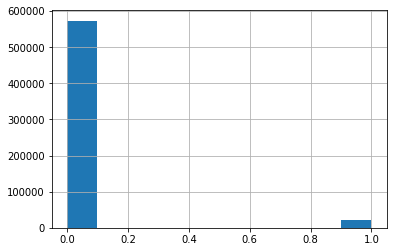

In [14]:
plt.figure();
target.hist()

In [15]:
from sklearn import datasets
iris = train
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris, target).predict(iris)
print("Number of mislabeled points out of a total %d points : %d" % (iris.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 595212 points : 55164


In [16]:
MultiClassConfusionMatrix(target, y_pred)

   accuracy  precision    recall  specificity
0   0.90732   0.965809  0.936985     0.123076
1   0.90732   0.068797  0.123076     0.936985


In [26]:
from sklearn import datasets
iris = train1
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris, target).predict(iris)
print("Number of mislabeled points out of a total %d points : %d" % (iris.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 595212 points : 55527


In [18]:
MultiClassConfusionMatrix(target, y_pred)

   accuracy  precision    recall  specificity
0  0.906711   0.965939  0.936194     0.127270
1  0.906711   0.070156  0.127270     0.936194


In [19]:
from sklearn import datasets
iris = train2
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris, target).predict(iris)
print("Number of mislabeled points out of a total %d points : %d" % (iris.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 595212 points : 57976


In [20]:
MultiClassConfusionMatrix(target, y_pred)

   accuracy  precision    recall  specificity
0  0.902596   0.966145  0.931554     0.137043
1  0.902596   0.070404  0.137043     0.931554


In [21]:
from sklearn import tree
iris = train1
clf = tree.DecisionTreeClassifier(max_depth=10)
y_pred = clf.fit(iris, target).predict(iris)
print("Number of mislabeled points out of a total %d points : %d" % (iris.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 595212 points : 21480


In [22]:
MultiClassConfusionMatrix(target, y_pred)

   accuracy  precision    recall  specificity
0  0.963912   0.963941  0.999953     0.011109
1  0.963912   0.899254  0.011109     0.999953


In [23]:
from sklearn import tree
iris = train2
clf = tree.DecisionTreeClassifier(max_depth=10)
y_pred = clf.fit(iris, target).predict(iris)
print("Number of mislabeled points out of a total %d points : %d" % (iris.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 595212 points : 21444


In [24]:
MultiClassConfusionMatrix(target, y_pred)

   accuracy  precision    recall  specificity
0  0.963973   0.963993  0.999960     0.012584
1  0.963973   0.922297  0.012584     0.999960


In [25]:
import graphviz 
from graphviz import Source
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=train.columns)
graph = graphviz.Source(dot_data) 
graph.render("second_tree",view = True)

ValueError: Length of feature_names, 54 does not match number of features, 15